# **Machine Learning**
![](http://www.expertsystem.com/wp-content/uploads/2017/03/What-is-machine-learning_Definition.jpg)

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.

The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers learn automatically without human intervention or assistance and adjust actions accordingly.

# **Some machine learning methods**
Machine learning algorithms are often categorized as supervised or unsupervised.

**Supervised machine learning** *algorithms can apply what has been learned in the past to new data using labeled examples to predict future events. Starting from the analysis of a known training dataset, the learning algorithm produces an inferred function to make predictions about the output values. The system is able to provide targets for any new input after sufficient training. The learning algorithm can also compare its output with the correct, intended output and find errors in order to modify the model accordingly.


In contrast, **unsupervised machine learning** algorithms are used when the information used to train is neither classified nor labeled. Unsupervised learning studies how systems can infer a function to describe a hidden structure from unlabeled data. The system doesn’t figure out the right output, but it explores the data and can draw inferences from datasets to describe hidden structures from unlabeled data.


**Semi-supervised machine learning** algorithms fall somewhere in between supervised and unsupervised learning, since they use both labeled and unlabeled data for training – typically a small amount of labeled data and a large amount of unlabeled data. The systems that use this method are able to considerably improve learning accuracy. Usually, semi-supervised learning is chosen when the acquired labeled data requires skilled and relevant resources in order to train it / learn from it. Otherwise, acquiringunlabeled data generally doesn’t require additional resources.


**Reinforcement machine learning** algorithms is a learning method that interacts with its environment by producing actions and discovers errors or rewards. Trial and error search and delayed reward are the most relevant characteristics of reinforcement learning. This method allows machines and software agents to automatically determine the ideal behavior within a specific context in order to maximize its performance. Simple reward feedback is required for the agent to learn which action is best; this is known as the reinforcement signal.



# **Regression Analysis**

Regression analysis is a reliable method of identifying which variables have impact on a topic of interest. The process of performing a regression allows you to confidently determine which factors matter most, which factors can be ignored, and how these factors influence each other.

In order to understand regression analysis fully, it’s essential to comprehend the following terms:

* **Dependent Variable**: This is the main factor that you’re trying to understand or predict. 
* **Independent Variables**: These are the factors that you hypothesize have an impact on your dependent variable.


In our application training example above, attendees’ satisfaction with the event is our dependent variable. The topics covered, length of sessions, food provided, and the cost of a ticket are our independent variables.

We will use USA hausing dataset for regression prediction.

### Let's begin. Import the libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

import os

# Any results you write to the current directory are saved as output.

In [3]:
df=pd.read_csv('data/USA_Housing.csv')

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [4]:
df.head()   

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df.describe() 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


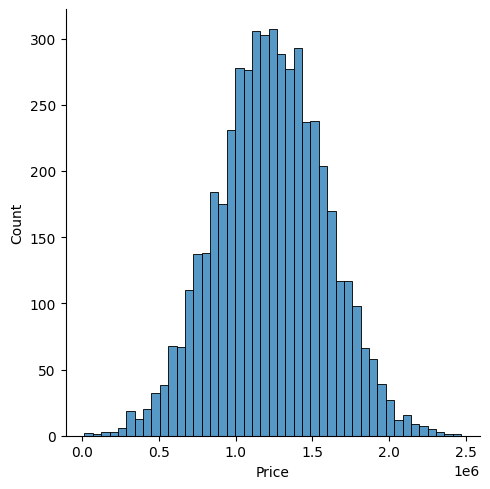

In [9]:
sns.displot(df['Price']) 

In [12]:
df.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

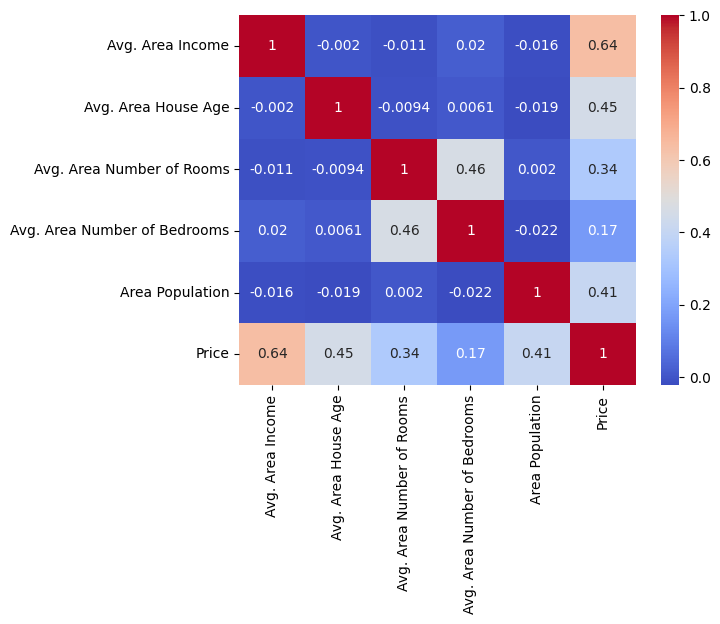

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [14]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=69) 

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(x_train,y_train) 

LinearRegression()

In [19]:
print(lm.intercept_)

-2628699.728284763


In [20]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff']) 
cdf


,Coeff
Avg. Area Income,21.479098
Avg. Area House Age,164270.251149
Avg. Area Number of Rooms,120101.086032
Avg. Area Number of Bedrooms,2860.553963
Area Population,15.341963


## Interpreting the coefficients:

__NOTE: The exact numbers might change__

- Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an *increase of $21.48*.
- Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an *increase of $164270.25*.
- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an *increase of $120101.09*.
- Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an *increase of $2860.55*.
- Holding all other features fixed, a 1 unit increase in Area Population is associated with an *increase of $15.34*.

In [21]:
predictions=lm.predict(x_test)

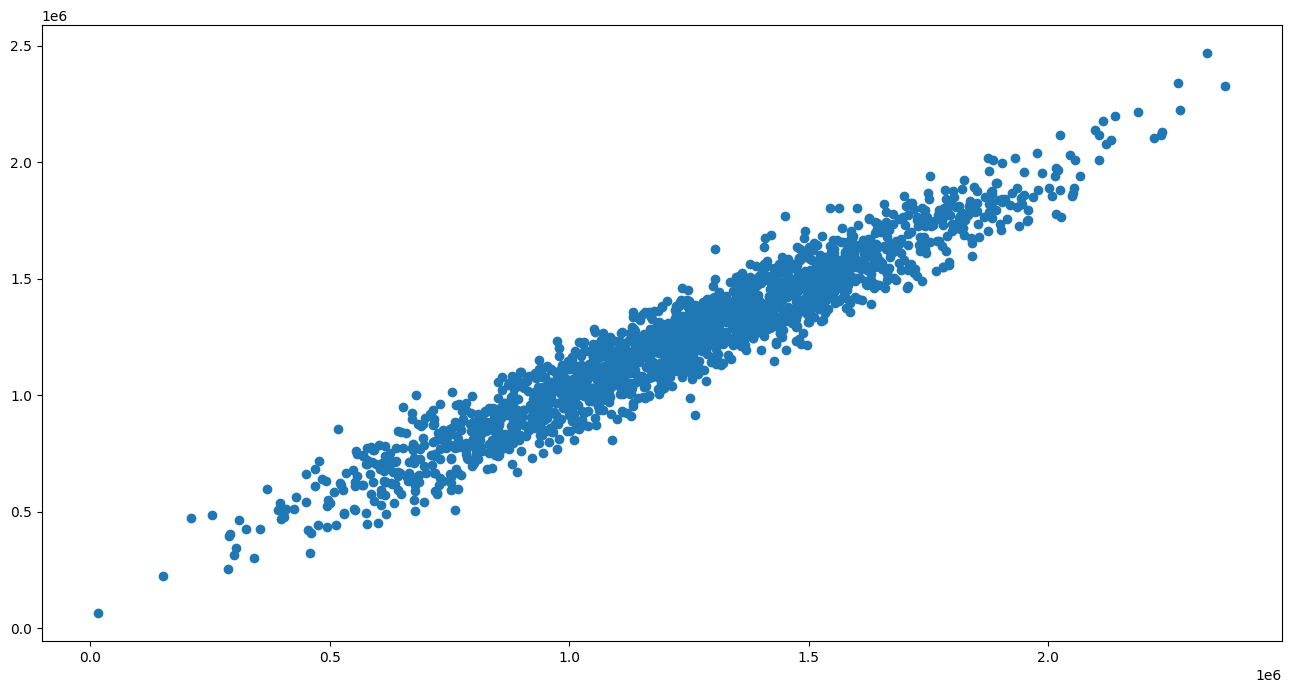

In [22]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,predictions)
plt.show()

In [33]:
y_test_list = y_test.to_list()
pred_list = predictions.tolist()

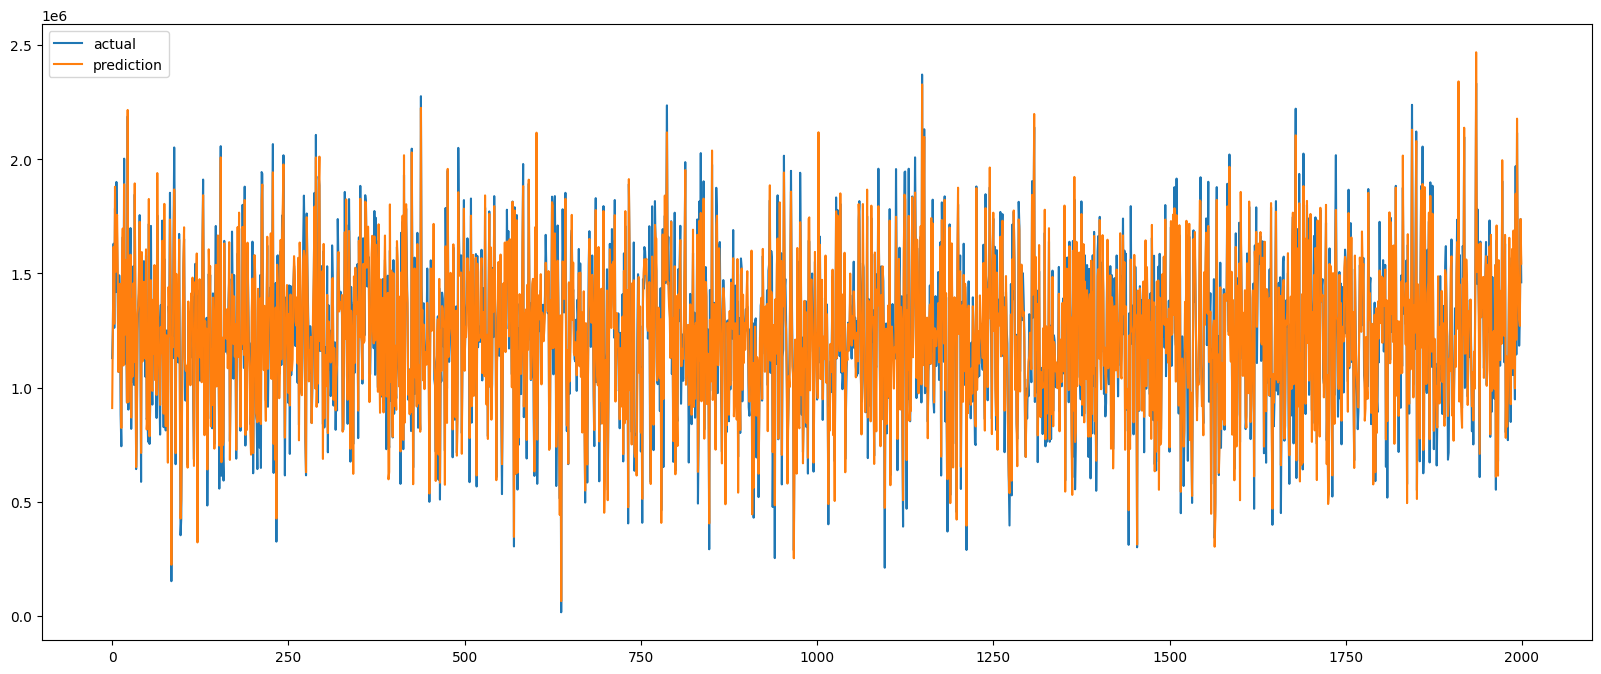

In [39]:
plt.figure(figsize=(20, 8))
plt.plot(y_test_list, label="actual")
plt.plot(pred_list, label="prediction")
plt.legend()
plt.show()

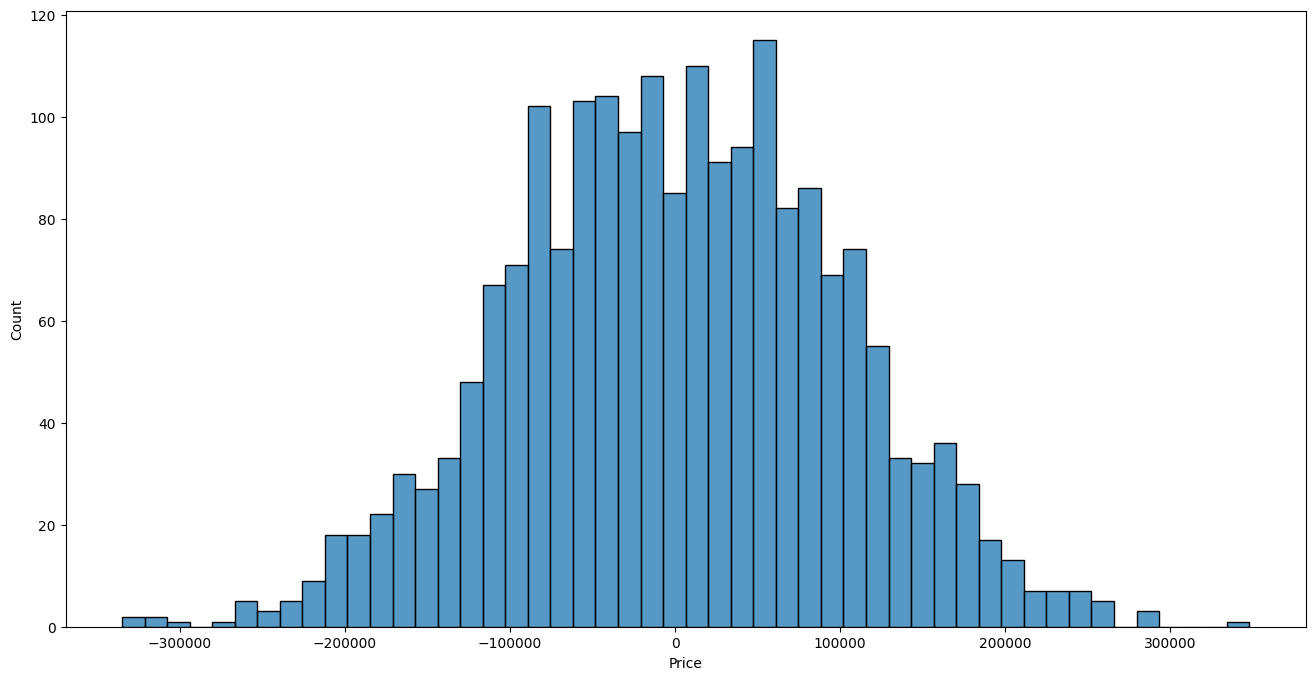

In [38]:
plt.figure(figsize=(16,8))
sns.histplot((y_test-predictions),bins=50)
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 80430.96501068502
MSE: 9888289439.583855
RMSE: 99439.87851754372
